In [ ]:
!git clone https://github.com/xserra/audio-coding-materials.git
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, dct, idct
from scipy.io.wavfile import read
import IPython.display as ipd

Cloning into 'audio-coding-materials'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 6.70 MiB | 10.55 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

In [ ]:
x, fs = read_sound('/content/audio-coding-materials/sinewave.wav')

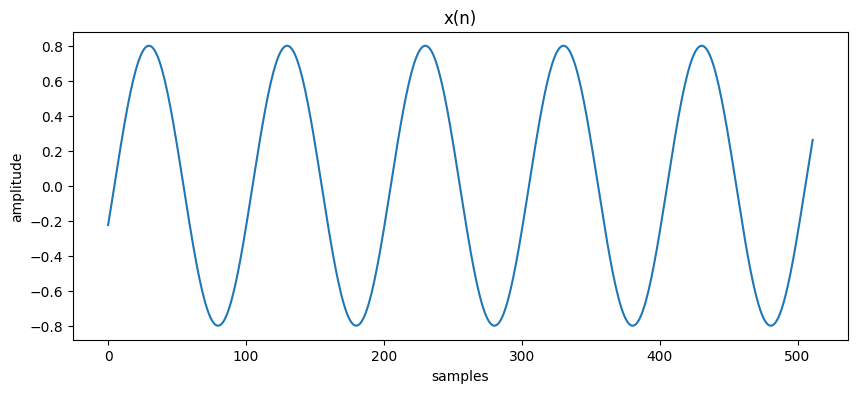

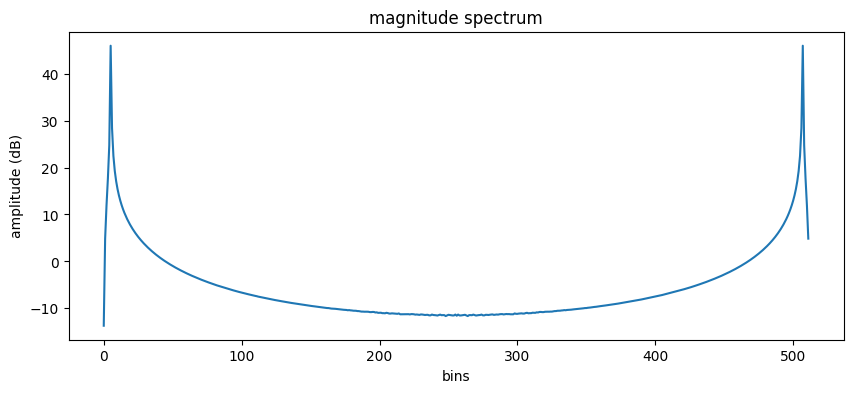

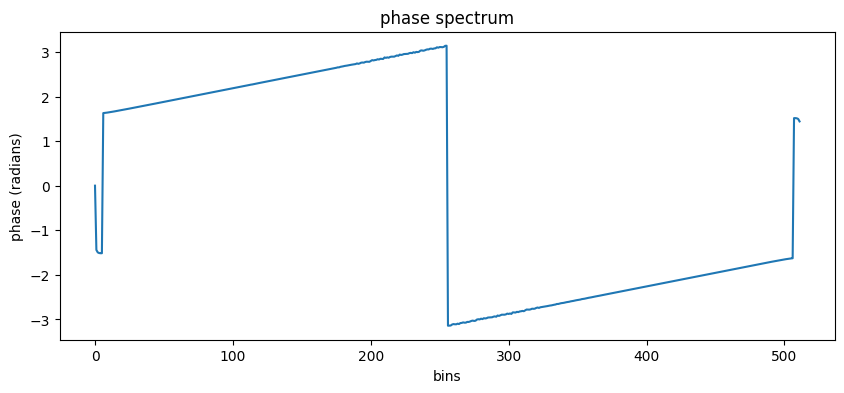

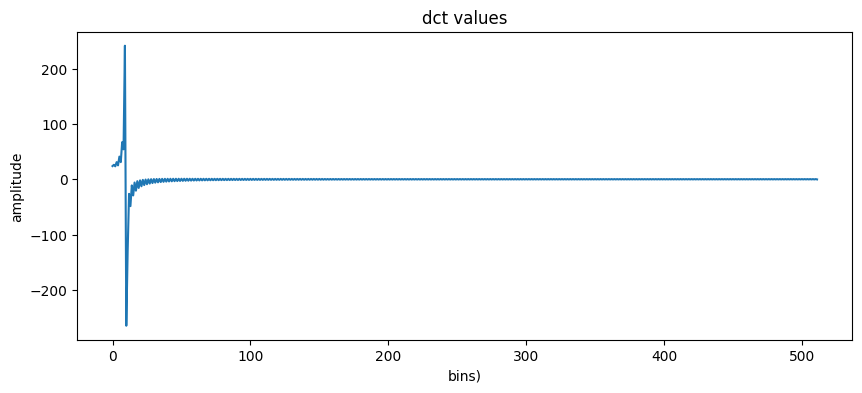

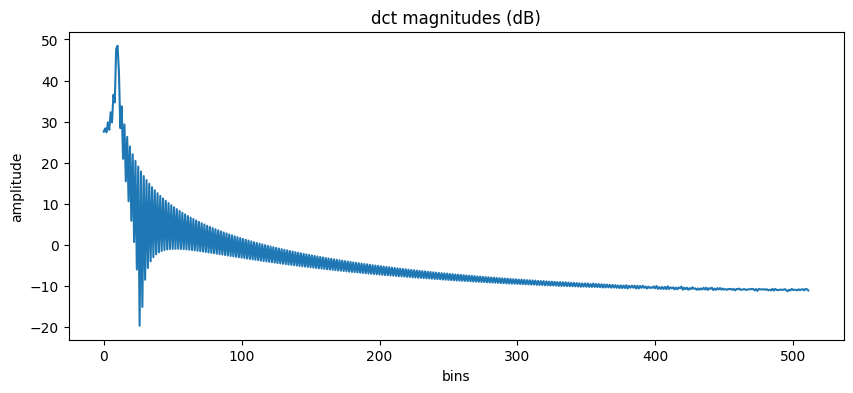

In [21]:
# perform dft and dct

N = 512
xf = x[2000:2000+N]

plt.figure(1, figsize=(10, 4))
plt.plot(xf)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('x(n)')
plt.show()

X_dft = fft(xf)
plt.figure(1, figsize=(10, 4))
plt.plot(20*np.log10(np.abs(X_dft)))
plt.xlabel('bins')
plt.ylabel('amplitude (dB)')
plt.title('magnitude spectrum')
plt.show()

X_dft = fft(xf)
plt.figure(1, figsize=(10, 4))
plt.plot(np.angle(X_dft))
plt.xlabel('bins')
plt.ylabel('phase (radians)')
plt.title('phase spectrum')
plt.show()

X_dct = dct(xf, type=4)
plt.figure(0, figsize=(10, 4))
plt.plot(X_dct)
plt.xlabel('bins)')
plt.ylabel('amplitude')
plt.title('dct values')
plt.show()

plt.figure(0, figsize=(10, 4))
plt.plot(20*np.log10(np.abs(X_dct)))
plt.xlabel('bins')
plt.ylabel('amplitude')
plt.title('dct magnitudes (dB)')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


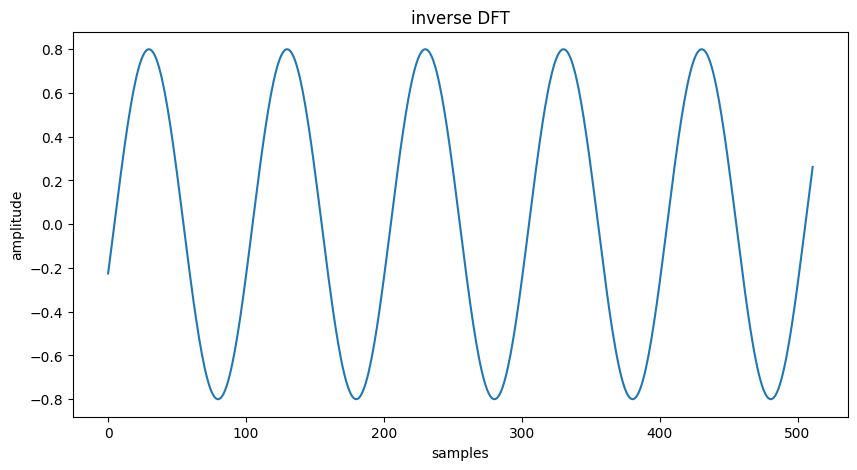

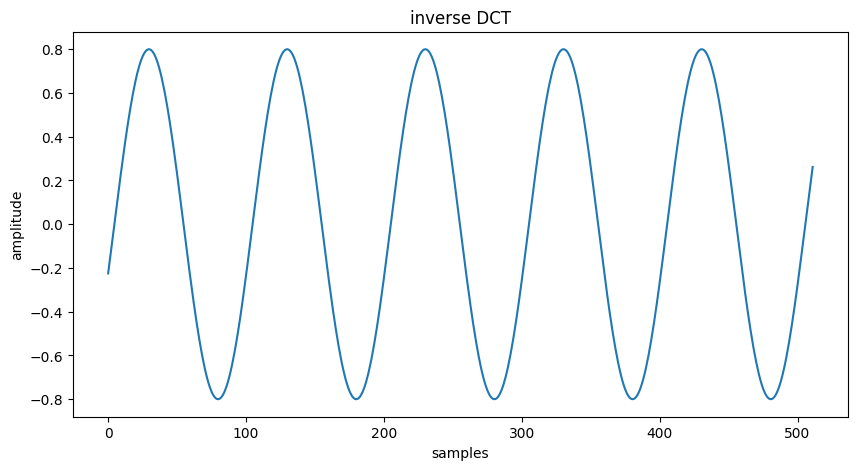

In [18]:
# perform inverse_dft and inverse_dct

y_idft = ifft(X_dft)
plt.figure(1, figsize=(10, 5))
plt.plot(y_idft)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('inverse DFT')
plt.show()

y_idct = idct(X_dct/(N*2), type=4)
plt.figure(1, figsize=(10, 5))
plt.plot(y_idct)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('inverse DCT')
plt.show()